In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from mi_modulo import *

In [2]:

ensayo3_excel = r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
ensayo5_excel = r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6_excel = r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"
coordenadas_csv = r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"


ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)
ensayo5_dict = pd.read_excel(ensayo5_excel, sheet_name=None, index_col=0)
ensayo6_dict = pd.read_excel(ensayo6_excel, sheet_name=None, index_col=0)


In [3]:

ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)
ensayos5_dfs = lista_dfs(ensayo5_dict)
ensayos6_dfs = lista_dfs(ensayo6_dict)

,th25,th50,th75,promedio,mu_sigma
min,0.016915,0.055561,0.210152,0.148728,0.186648
max,0.680820,0.768026,0.859416,0.758803,0.780441
mediana,0.135265,0.288254,0.480688,0.333706,0.384217
cosa_rara,0.066142,0.090804,0.077428,0.068714,0.067877


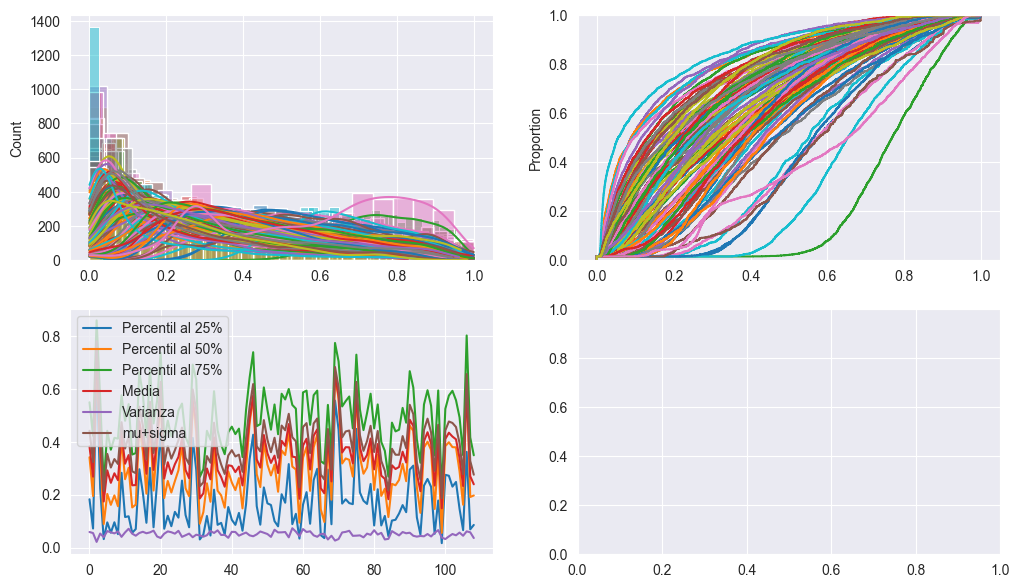

In [4]:

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos4_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'],
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_
test_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'],
                       index=['min', 'max', 'mediana', 'cosa_rara'])

estadisticos_ = [th25, th50, th75, promedio, mu_sigma]

for idx, columna in enumerate(test_df.columns):
    test_df[columna] = [np.min(estadisticos_[idx]), np.max(estadisticos_[idx]),
                        np.median(estadisticos_[idx]), stats.median_abs_deviation(estadisticos_[idx])]

display(test_df)

In [5]:
# Lo que nos arrojan estos estadísticos: Primero la mediana nos dice que el 50% de las conexiones tienen una fuerza menor a 0.27, por o que la mayoria de las conexiones son ruido o demasiado debiles por lo que un umbral bajo debería entrar ese ruido. Pero el percentil 75 nos dice que el 25% de las conexiones más fuertes empezaban a partir de 0.48 por lo que un umbral de 5 deberia considerar estas conexiones

,th25,th50,th75,promedio,mu_sigma
min,0.016915,0.055561,0.210152,0.148728,0.186648
max,0.680820,0.768026,0.859416,0.758803,0.780441
mediana,0.135265,0.288254,0.480688,0.333706,0.384217
cosa_rara,0.066142,0.090804,0.077428,0.068714,0.067877


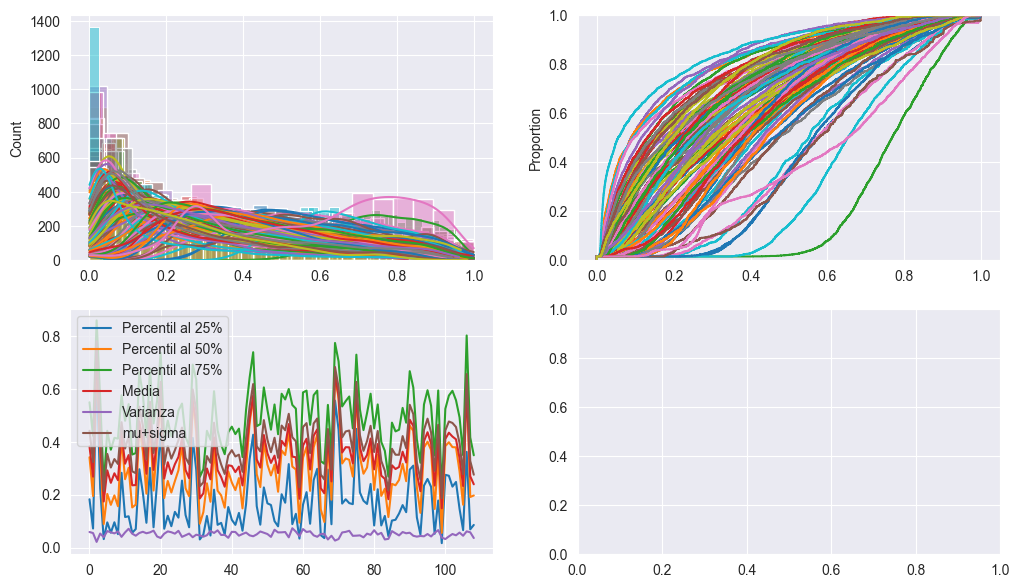

In [6]:

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos4_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'],
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_
test_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'],
                       index=['min', 'max', 'mediana', 'cosa_rara'])

estadisticos_ = [th25, th50, th75, promedio, mu_sigma]

for idx, columna in enumerate(test_df.columns):
    test_df[columna] = [np.min(estadisticos_[idx]), np.max(estadisticos_[idx]),
                        np.median(estadisticos_[idx]), stats.median_abs_deviation(estadisticos_[idx])]

display(test_df)


In [7]:
# Estas estadísticas son reforzantes a la conclusión del umbral, ya que el percentil 75 se mantiene en 0.48 por lo que un umbral de 5 está bien

In [8]:
# El siguiente rango de umbrales me ayudará a decidir cuál utilizar
rango_umbrales = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# El umbral de la población está al 60 para mantener una base solida de datos
th_poblacion = 0.6
barridoumbrales = []

lista3 = ensayos3_dfs

for th in rango_umbrales:
    try:
        df_resultado = capsula(lista3, th, th_poblacion)

        grafoumbral = nx.from_pandas_adjacency(df_resultado)

        numnodos = grafoumbral.number_of_nodes()
        numar = grafoumbral.number_of_edges()
        densidad = nx.density(grafoumbral)

        conectados = nx.is_connected(grafoumbral)
        numcomp = nx.number_connected_components(grafoumbral)

        barridoumbrales.append({
            'Umbral': th,
            'Nodos': numnodos,
            'Aristas': numar,
            'Densidad': round(densidad, 3),
            'Conectado': conectados,
            'Componentes': numcomp
        })
    except Exception as e:
        print(f"Error {th}: {e}")

# En esta tabla imprimo los resultados de la investigación de umbrales para visualizar mejor qué umbrales son mejores
tablaumbrales3 = pd.DataFrame(barridoumbrales)
tablaumbrales3.set_index('Umbral', inplace=True)

display(tablaumbrales3)

,Nodos,Aristas,Densidad,Conectado,Componentes
Umbral,,,,,
0.3,64,849,0.421,False,2
0.4,64,584,0.290,False,3
0.5,64,390,0.193,False,7
0.6,64,255,0.126,False,14
0.7,64,138,0.068,False,21
0.8,64,64,0.032,False,27


In [9]:
#las cosas más importantes de la tabla son: densidad, ya que buscamos una densidad del 15 al 30%, asi que buscamos un .25 aprox, no podemos tener muchos componentes porque significa que el umbral esta tan alto, que segmenta o secciona regiones

# por esta razón mi umbral debe ser 5 para ensayo 3, elimina las conexiones débiles pero aún mantiene suficiente de la red

In [10]:
# El siguiente rango de umbrales me ayudará a decidir cuál utilizar
rango_umbrales = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# El umbral de la población está al 60 para mantener una base solida de datos
th_poblacion = 0.6
barridoumbrales = []

lista6 = ensayos6_dfs

for th in rango_umbrales:
    try:
        df_resultado = capsula(lista6, th, th_poblacion)

        grafoumbral = nx.from_pandas_adjacency(df_resultado)

        numnodos = grafoumbral.number_of_nodes()
        numar = grafoumbral.number_of_edges()
        densidad = nx.density(grafoumbral)

        conectados = nx.is_connected(grafoumbral)
        numcomp = nx.number_connected_components(grafoumbral)

        barridoumbrales.append({
            'Umbral': th,
            'Nodos': numnodos,
            'Aristas': numar,
            'Densidad': round(densidad, 3),
            'Conectado': conectados,
            'Componentes': numcomp
        })
    except Exception as e:
        print(f"Error procesando umbral {th}: {e}")

# En esta tabla imprimo los resultados de la investigación de umbrales para visualizar mejor qué umbrales son mejores
tablaumbrales6 = pd.DataFrame(barridoumbrales)
tablaumbrales6.set_index('Umbral', inplace=True)

display(tablaumbrales6)

,Nodos,Aristas,Densidad,Conectado,Componentes
Umbral,,,,,
0.3,64,849,0.421,False,2
0.4,64,593,0.294,False,3
0.5,64,394,0.195,False,7
0.6,64,263,0.130,False,12
0.7,64,149,0.074,False,18
0.8,64,74,0.037,False,25


In [11]:
# A pesar de que corrí esta tabla para ensayos 4,5,6, dejo unicamente la de 6 para demostrar que el umbral se mantiene para todos los ensayos

In [12]:
#Aqui solo creamos los df filtrados con el umbral 5 y poblacion al 60%
resultado3_df = capsula(ensayos3_dfs, 0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs, 0.5, 0.6)
resultado5_df = capsula(ensayos5_dfs, 0.5, 0.6)
resultado6_df = capsula(ensayos6_dfs, 0.5, 0.6)

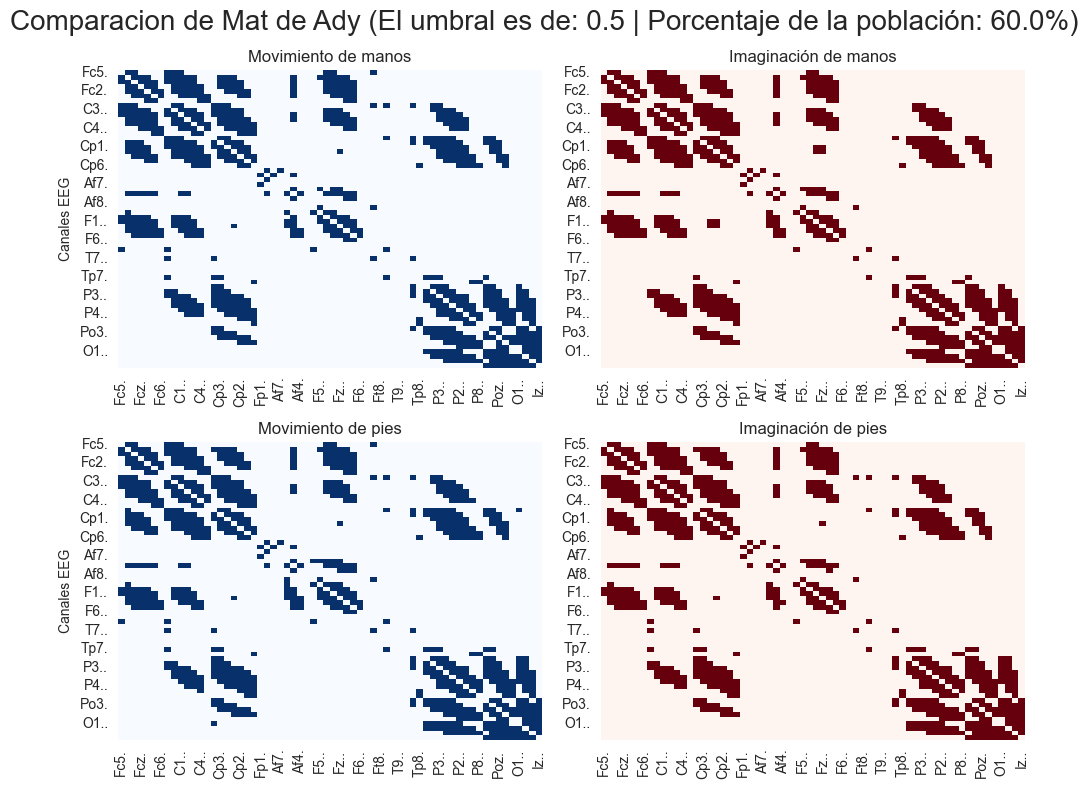

In [13]:

# Aquí visualizaré las matrices de adyacencia de los 4 ensayos para ver diferencias
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Primero analizaré las manos, pero en azul estara el movimiento real y en rojo el imaginario, lo mismo para los pies

sns.heatmap(resultado3_df, ax=axes[0, 0], cbar=False, cmap="Blues")
axes[0, 0].set_title("Movimiento de manos")
axes[0, 0].set_ylabel("Canales EEG")

sns.heatmap(resultado4_df, ax=axes[0, 1], cbar=False, cmap="Reds")
axes[0, 1].set_title("Imaginación de manos")

sns.heatmap(resultado5_df, ax=axes[1, 0], cbar=False, cmap="Blues")
axes[1, 0].set_title("Movimiento de pies")
axes[1, 0].set_ylabel("Canales EEG")

sns.heatmap(resultado6_df, ax=axes[1, 1], cbar=False,cmap="Reds")
axes[1, 1].set_title("Imaginación de pies")

plt.suptitle(f"Comparacion de Mat de Ady (El umbral es de: {0.5} | Porcentaje de la población: {0.6*100}%)", fontsize=20)
plt.tight_layout()
plt.show()

In [14]:
# En la comparación de manos y pies: real e imaginario, podemos observar algunas zonas activas (que vemos aqui como puntos pequeños) que se encuentran en la corteza motora primaria en zonas frontotemporales, esto hace sentido ya que son las áreas de movimiento y por eso los vemos activos en el movimiento real, en manos imaginario no lo vemos activo lo que da sustento a que sí hay una diferencia entre hacer un movimiento y solo imaginarlo, en los pies no se nota mucho la diferencia, esto, de nuevo, porque la representación de los pies es profunda en la corteza, pero lo veremos con los estadísticos

#Pero se escogió un umbral bueno ya que vemos la moludaridad del cerebro que se conservan en ambos movimientos "reales e imaginarios"

In [15]:
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df)
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_df)
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df)

(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3,
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4,
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4 ) = metricas_grafo(ensayo4_grafo_)

(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5,
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6,
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6 ) = metricas_grafo(ensayo6_grafo_)

print(f"--- ANÁLISIS MANOS (Umbral {.5}) ---")
print(f"Métrica            | Real (E3) | Imaginado (E4) | Diferencia")
print(f"-------------------|-----------|----------------|-----------")
print(f"Eficiencia Global  | {global_eff_3:.4f}    | {global_eff_4:.4f}         | {global_eff_3 - global_eff_4:.4f}")
print(f"Eficiencia Local   | {local_eff_3:.4f}    | {local_eff_4:.4f}         | {local_eff_3 - local_eff_4:.4f}")
print(f"Clustering Coeff   | {clust_coeff_3:.4f}    | {clust_coeff_4:.4f}         | {clust_coeff_3 - clust_coeff_4:.4f}")
print(f"Small-World Sigma  | {small_world_sigma_3:.4f}    | {small_world_sigma_4:.4f}         | {small_world_sigma_3 - small_world_sigma_4:.4f}")
print("\n")

print(f"--- ANÁLISIS PIES (Umbral {.5}) ---")
print(f"Métrica            | Real (E5) | Imaginado (E6) | Diferencia")
print(f"-------------------|-----------|----------------|-----------")
print(f"Eficiencia Global  | {global_eff_5:.4f}    | {global_eff_6:.4f}         | {global_eff_5 - global_eff_6:.4f}")
print(f"Eficiencia Local   | {local_eff_5:.4f}    | {local_eff_6:.4f}         | {local_eff_5 - local_eff_6:.4f}")
print(f"Clustering Coeff   | {clust_coeff_5:.4f}    | {clust_coeff_6:.4f}         | {clust_coeff_5 - clust_coeff_6:.4f}")
print(f"Small-World Sigma  | {small_world_sigma_5:.4f}    | {small_world_sigma_6:.4f}         | {small_world_sigma_5 - small_world_sigma_6:.4f}")


--- ANÁLISIS MANOS (Umbral 0.5) ---
Métrica            | Real (E3) | Imaginado (E4) | Diferencia
-------------------|-----------|----------------|-----------
Eficiencia Global  | 0.4376    | 0.4336         | 0.0039
Eficiencia Local   | 0.6807    | 0.6653         | 0.0153
Clustering Coeff   | 0.5527    | 0.5491         | 0.0036
Small-World Sigma  | nan    | nan         | nan


--- ANÁLISIS PIES (Umbral 0.5) ---
Métrica            | Real (E5) | Imaginado (E6) | Diferencia
-------------------|-----------|----------------|-----------
Eficiencia Global  | 0.4432    | 0.4395         | 0.0037
Eficiencia Local   | 0.6900    | 0.6835         | 0.0066
Clustering Coeff   | 0.5603    | 0.5606         | -0.0003
Small-World Sigma  | nan    | nan         | nan


In [16]:
# Imprimí la tabla para poder recordar para qué me servían algunos datos, utilicé inteligencia artificial para el código que genera la tabla y se viera más organizada
# Aqui podemos ver que la eficiencia global, que es mayor en la real que en la imaginaria, lo que significa que cuando se mueven las manos realmente la red es más rápida y directa. En cambio, cuando se imagina el movimiento la red integra menos, mi suposición es que se debe a la falta de activación de neuronas corticales para el movimiento motor en manos. El clustering tambien nos muestra que la imaginación de movimiento es menos especializada localmente, esto lo atribuyo a la misma falta de activación específica para movimiento de músculos agonistas y relajación de músculos antagonistas. Al ser imaginario, se activan ciertas áreas cercanas al movimiento, tal vez en preparación al movimiento real, pero no generan una especialización local al no mover músculos específicos y refinar esos movimientos.

# Todas estas inferencias se hacen basandose en las manos, pero en los pies podemos ver una diferencia entre las redes muy pequeña, como se vio en las matrices, esto, como lo mencioné antes, me imagino que se debe a que la representacion motora en el Homúnculo de los pies en la corteza se encuentra en la cisura interhemisférica, es una cisura profunda que puede dificultar la lectura por un electrodo de EEG, aunque no puedo descartar que la diferencia de esfuerzo entre motor e imaginario sea indiferenciable para el umbral

#quiero destacar que en sigma aparece como Nan porqeu la red no es sun solo bloque, en el umbral podíamos distingir 7 componentes, por lo que no podemos buscar el camino mas corto entre componentes que no estan conectados

In [17]:

eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

Resultados para Ensayo 3:
 > Eficiencia Global: 0.4376
 > Clustering: 0.5527
 > Modularidad: 0.3199
 > Hub Principal: Afz. (0.121)
----------------------------------------


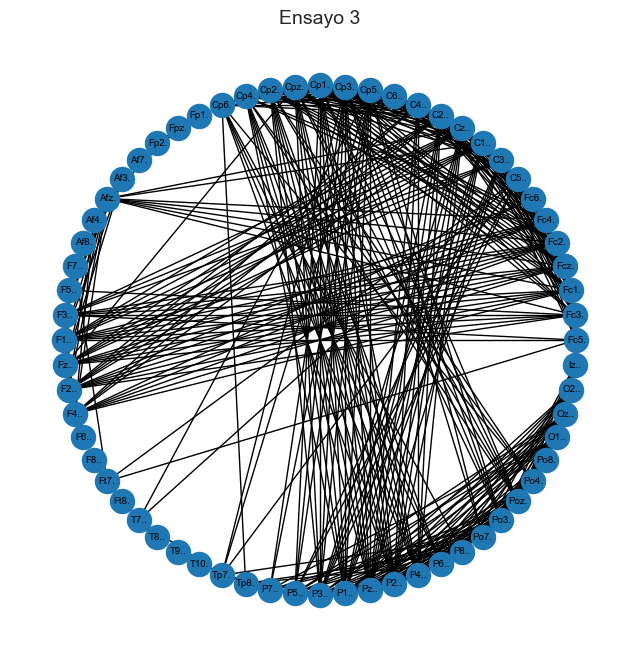

Resultados para Ensayo 4:
 > Eficiencia Global: 0.4336
 > Clustering: 0.5491
 > Modularidad: 0.3143
 > Hub Principal: Afz. (0.122)
----------------------------------------


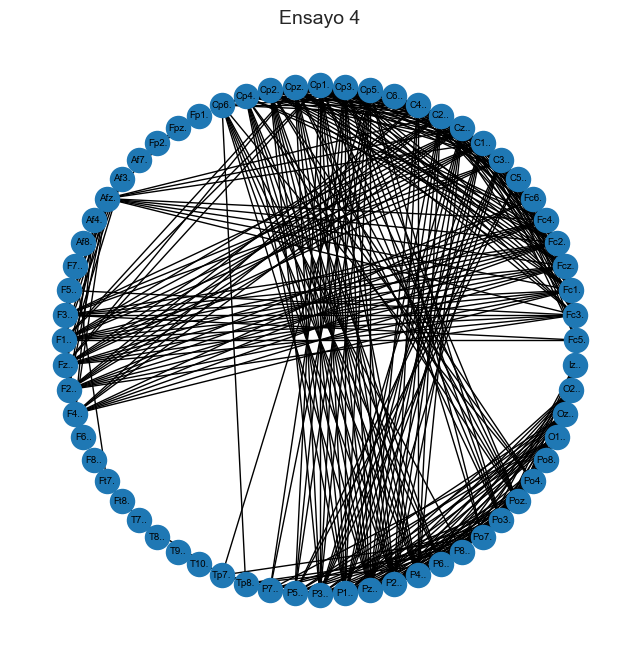

Resultados para Ensayo 5:
 > Eficiencia Global: 0.4432
 > Clustering: 0.5603
 > Modularidad: 0.3154
 > Hub Principal: Afz. (0.118)
----------------------------------------


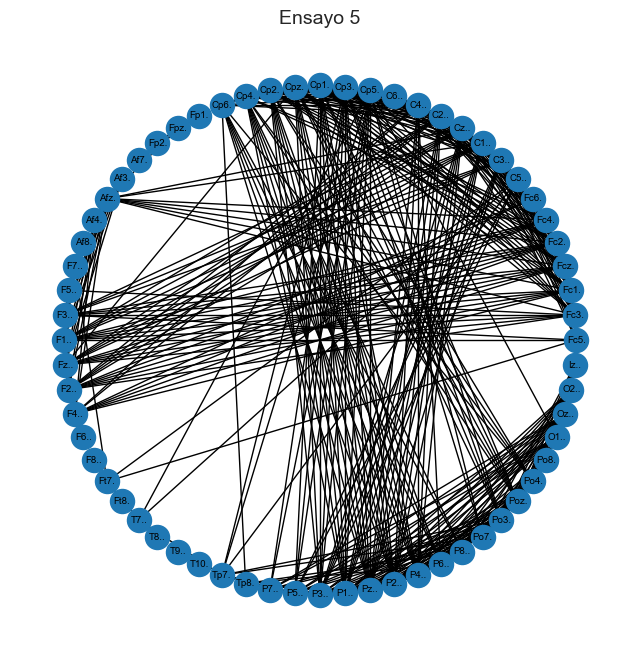

Resultados para Ensayo 6 :
 > Eficiencia Global: 0.4395
 > Clustering: 0.5606
 > Modularidad: 0.3152
 > Hub Principal: Afz. (0.126)
----------------------------------------


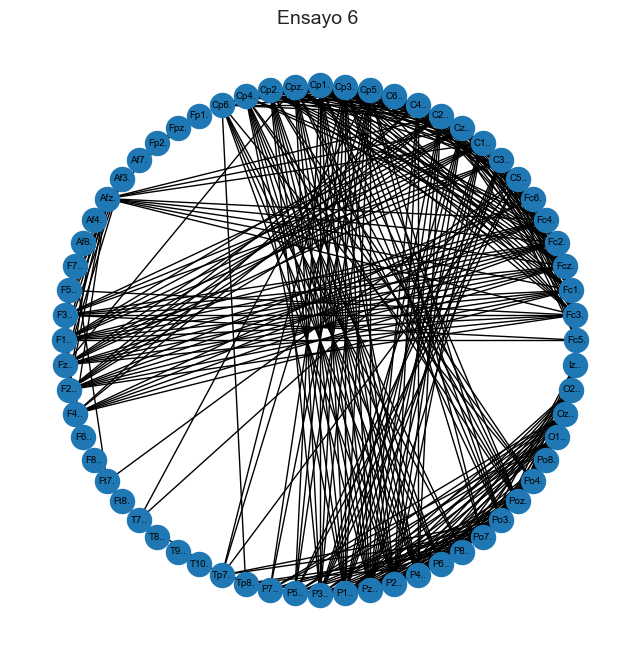

In [18]:

tareas = [
    ("Ensayo 3", ensayos3_dfs),
    ("Ensayo 4", ensayos4_dfs),
    ("Ensayo 5", ensayos5_dfs),
    ("Ensayo 6 ", ensayos6_dfs)
]
for nombre, datos_sujetos in tareas:

    df_resultado = capsula(datos_sujetos, 0.5, 0.6)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)

    grafo = grafo2D(df_resultado, ax)
    ax.set_title(f"{nombre}", fontsize=14)

    (clust, path, sigma, coms, mod, betw, eff_g, eff_l, deg) = metricas_grafo(grafo)
    hub_info = betw[0]

    print(f"Resultados para {nombre}:")
    print(f" > Eficiencia Global: {eff_g:.4f}")
    print(f" > Clustering: {clust:.4f}")
    print(f" > Modularidad: {mod:.4f}")
    print(f" > Hub Principal: {hub_info[0]} ({hub_info[1]:.3f})")
    print("-" * 40)

    plt.show()

In [19]:
# Primero notamos que el HUB es Afz, un nodo que lejos de encontrarse en cortezas motora, se encuentra en la linea media frontal que se encarga de atención ejecutiva, toma de decisiones y planificación lo cual es consistente por el tipo de ejercicio, ya que todos los ensayos requieren de planificación de movimientos (aunque sean imaginarios) por el esfuerzo cognitivo que se requiere para mantener la atención. Esto se mantiene consistente con ambos ejercicios ya que se activa en ambos estados
# Sin embargo la eficiencia global sigue cayendo cuanso cambiamos de motor a imaginario porque requiere menos esfuerzo que a motora
#Aparte los grafos 2D se ven muy parecidos porque las diferencias son funcionales y algo sutiles, no es anatomica, por eso se ven tan parecidos.

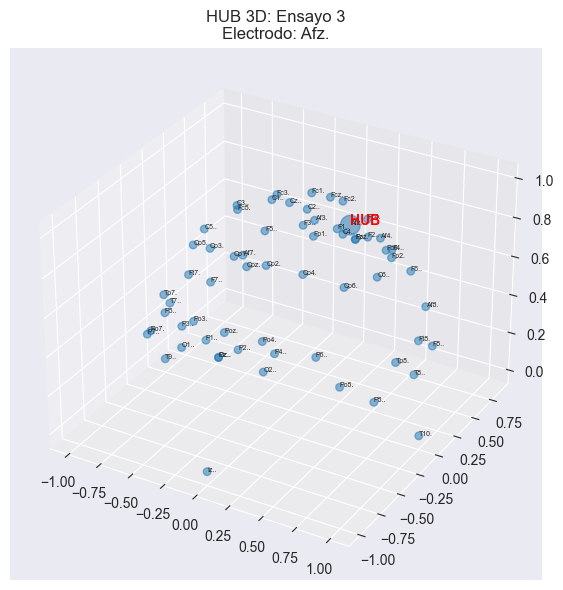

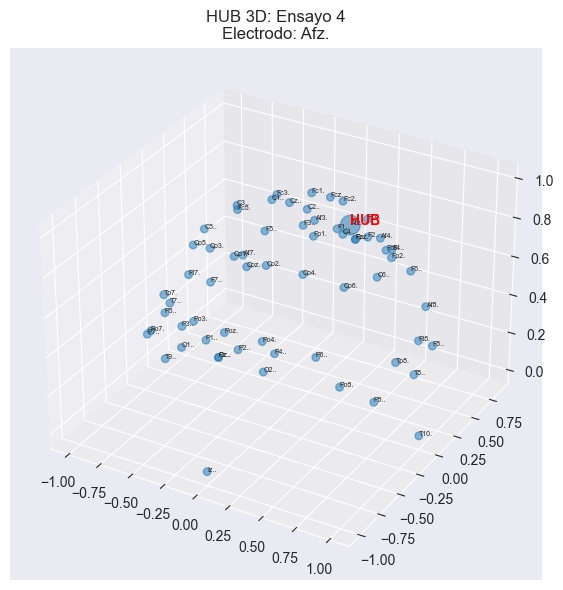

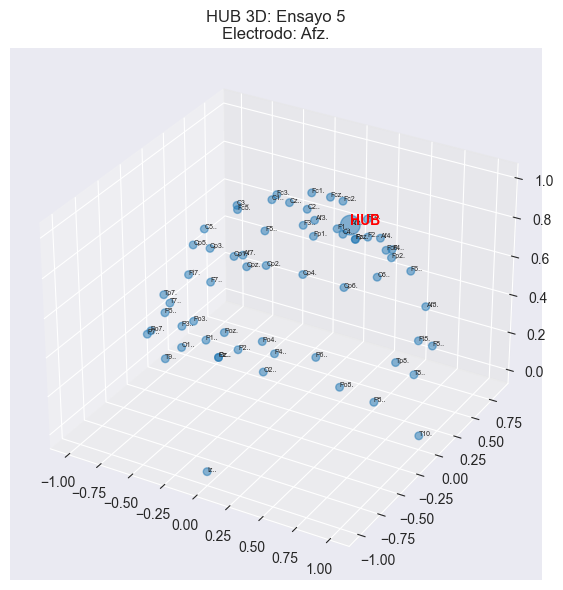

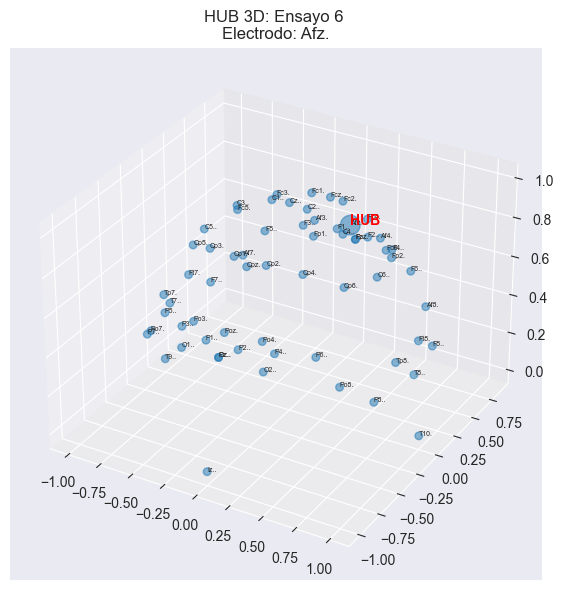

In [20]:

for nombre, datos_sujetos in tareas:

    df_resultado = capsula(datos_sujetos, 0.5, 0.6)
    grafohub = nx.from_pandas_adjacency(df_resultado)

    metricas = metricas_grafo(grafohub)
    betweenness = metricas[5]
    hub_info = betweenness[0]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    grafo3D(eeg_coords, hub_info, ax)

    ax.set_title(f"HUB 3D: {nombre}\nElectrodo: {hub_info[0]}", fontsize=12)
    plt.tight_layout()
    plt.show()

In [21]:
# Esto solo confirma lo del HUB siendo el punto principal funcional, por lo que todo el ejercicio se guia por un área de control de la atencion y control ejecutivo de desiciones, más que algo motor

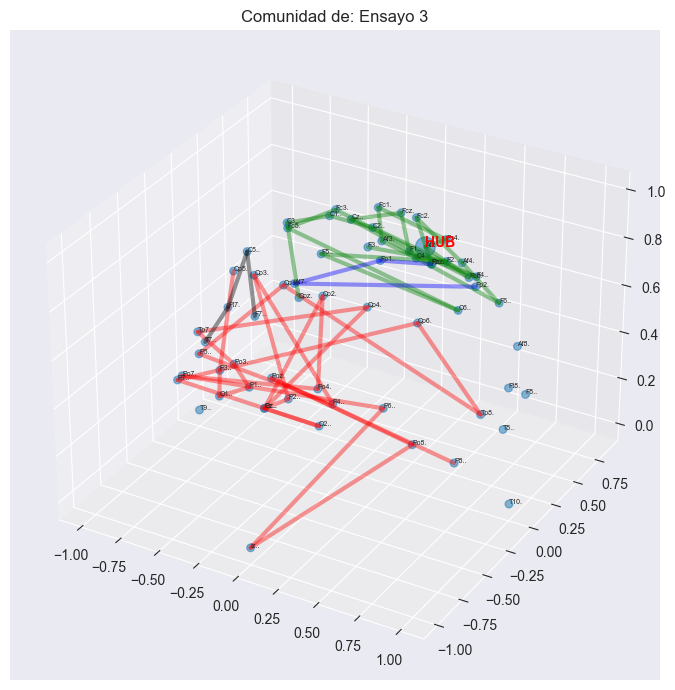

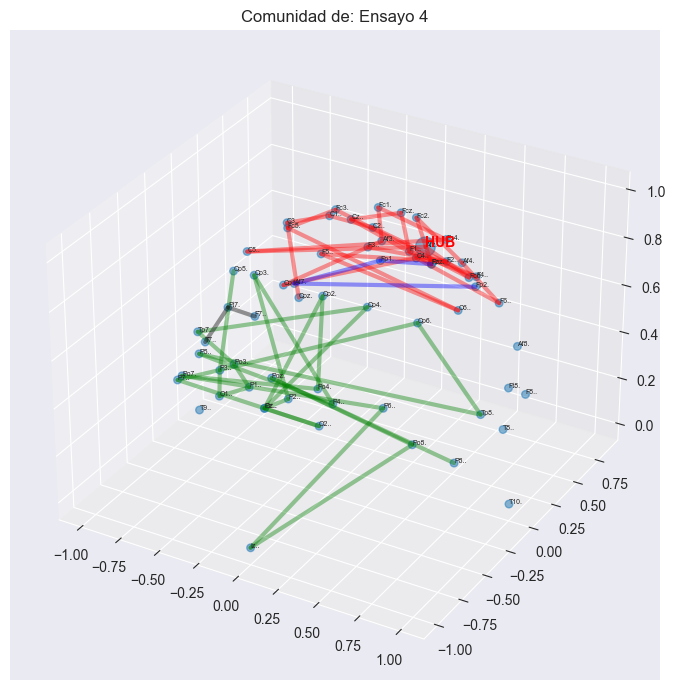

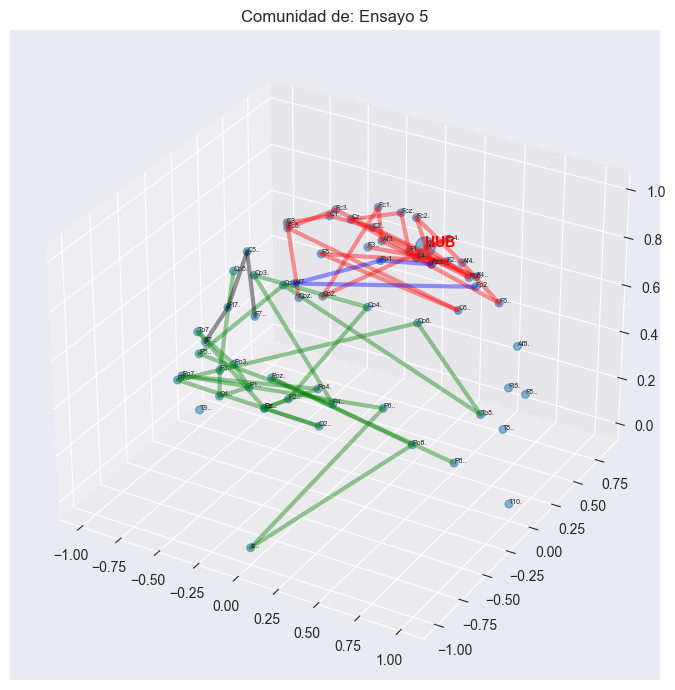

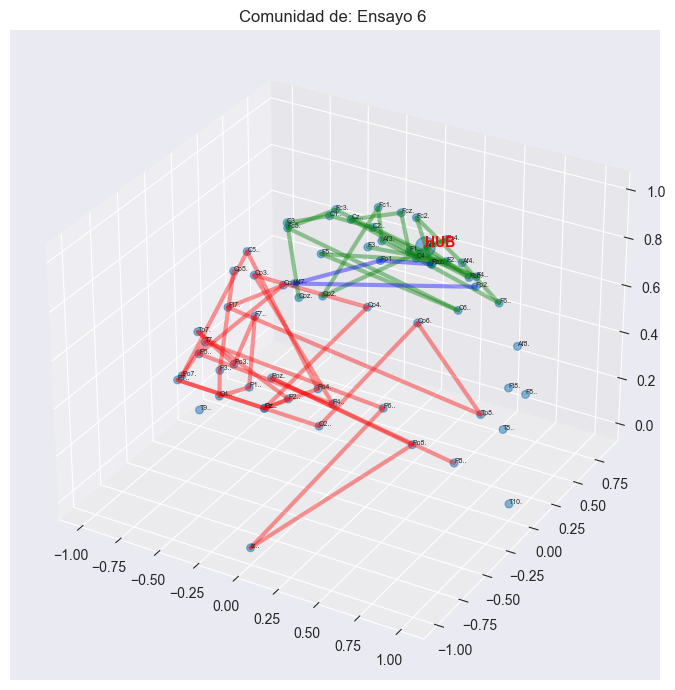

In [22]:
for nombre, datos_sujetos in tareas:

    df_resultado = capsula(datos_sujetos, 0.5, 0.6)
    grafocom = nx.from_pandas_adjacency(df_resultado)

    metricas = metricas_grafo(grafocom)
    comunidades = metricas[3]
    betweenness = metricas[5]
    hub_info = betweenness[0]


    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    grafo_comunidades(comunidades, hub_info, eeg_coords, ax)

    ax.set_title(f"Comunidad de: {nombre}", fontsize=12)
    plt.tight_layout()
    plt.show()

In [23]:
# No veo la necesidad de realizar más observaciones o analisis, ya que a lo largo de este script he ido desmenusando las diferencias entre ejercicios motores e imaginarios, aparte algunas diferencias entre pies y manos, por lo que conlcuiré con los analisis de los grafos 3D.
# Iniciaremos con el analisis de los colores, primero vemos modulos rojos en areas forntales centrales, esto es porque es un módulo ejecutivo motor, como lo he mencionado antes se encarga de planificar y ejecutar la acción
# Tenemos otra comunidad en las areas parietales occipitales, que es la parte trasera, estas areas procesan la informacion sensorial y visual porque los sujetos debian observar un estímulo visual, estos modulos se presentan constantes en los diferentes ensayos, auqnue pueden cambiar la intensidad pero nos explica la conectividad entre áreas durante los ensayos

# Muchas de esas conexiones salen de Afz que es constante a lo descrito previamente, ya que si el HUB hubiera estado en otras áreas como C3 y C4 que son controles motores serian conexiones locales, por lo que el cerebro o sus conexiones están centralizadas en el control de tareas

#Ahora comparando entre ensayo motor de manos e imaginario de manos, las lineas rojas y azules en el ensayo 3, que representan la conexion entre la parte frontal con la parte trasera, estas conexiones se ven mas densas y solidas en el ensayo 3, a diferencia del 4 que es imaginario, donde estas conexiones son menos densas , por lo que vemos la baja de eficiencia global

# Una conclusión desde las neurociencias podemos observar que las tareas imaginadas, como lo son el ensayo 4 y 6 demuestran que imaginar movimientos, no es un proceso aislado, ya que activa los mismos circuitos funcionales que un movimiento real (ensayos 3 y 5)